This notebook reads in the datasets that are already upsampled, standard-scaled, and train-test-split so we can use the same initial features (35) for consistency for RandomForest from Linear Models.    

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline 
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
import sklearn.model_selection as ms
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn import ensemble

X_train = pd.read_csv('./X_train.csv', index_col=0)
X_test = pd.read_csv('./X_test.csv', index_col=0)
y_train = pd.read_csv('./y_train.csv', index_col=0)
y_test = pd.read_csv('./y_test.csv', index_col=0)

In [2]:
X_train.head()

,Unique_County,Unique_States,Avg_AdmissionDuration,Avg_ClaimDuration,Avg_Total_ClmProcedureCode,Avg_Total_ClmDiagnosisCode,DiagnosisGroupCode_count,Unique_DiagnosisGroupCode,ClmAdmitDiagnosisCode_count,Unique_ClmAdmitDiagnosisCode,...,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,Age_20-30,Age_30-40,Age_40-50,Age_50-60,Age_60-70,Age_70-80,Age_80-90,Age_90-101
0,-0.166326,-0.524122,-0.425291,0.339014,-0.437440,-0.537097,-0.336670,-0.359205,-0.058553,0.010156,...,0.35,0.07,0.00,0.02,0.07,0.15,0.16,0.27,0.27,0.05
1,0.025710,-0.182495,-0.425291,-0.790589,-0.437440,0.187966,-0.336670,-0.359205,-0.341867,-0.431924,...,0.37,0.16,0.00,0.00,0.05,0.00,0.00,0.63,0.26,0.05
2,0.217745,0.159131,-0.425291,-0.173476,-0.437440,-0.283265,-0.336670,-0.359205,-0.310387,-0.376664,...,0.35,0.09,0.04,0.00,0.00,0.04,0.09,0.48,0.35,0.00
3,-0.742434,-0.524122,-0.425291,0.439202,-0.437440,-0.814006,-0.336670,-0.359205,-0.310387,-0.376664,...,0.37,0.11,0.00,0.05,0.05,0.05,0.11,0.39,0.29,0.05
4,0.217745,0.159131,-0.002242,-0.177867,0.223641,-0.182171,0.341722,0.414753,0.130323,0.341716,...,0.22,0.12,0.00,0.03,0.07,0.05,0.15,0.37,0.25,0.08


In [3]:
X_train.shape

(4462, 35)

In [4]:
X_test.shape

(1623, 35)

In [5]:
y_train = pd.Series(y_train['PotentialFraud'], dtype='int32')

In [6]:
y_test = pd.Series(y_test['PotentialFraud'], dtype='int32')

In [19]:
param_grid= {
    'criterion': ['gini'],
    'n_estimators': [100, 200, 300],
    'max_depth': [12,13,14], 
    'max_features': [8,10,12],
    'min_samples_leaf': [3,4,5]
}

In [20]:
from sklearn.ensemble import RandomForestClassifier 
rf_Model = RandomForestClassifier(random_state=1)  

from sklearn.model_selection import GridSearchCV, KFold 
rf_Grid = GridSearchCV(rf_Model, param_grid = param_grid, cv=KFold(shuffle= True, random_state=1), verbose=2, n_jobs=-1, scoring='roc_auc')

In [21]:
random_Grid = rf_Grid.fit(X_train, y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


In [23]:
rf_Grid.best_params_

{'criterion': 'gini',
 'max_depth': 14,
 'max_features': 12,
 'min_samples_leaf': 3,
 'n_estimators': 100}

In [24]:
rf_Grid.best_score_

0.9720655671283851

In [25]:
print(rf_Grid.score(X_train, y_train))
print(rf_Grid.score(X_test, y_test))

0.9993964711680519
0.9356730115567641


In [28]:
from sklearn.metrics import confusion_matrix
y_true = y_test
y_pred = rf_Grid.best_estimator_.predict(X_test)
# y_pred1 = rf_Grid.best_estimator_.predict(X_test)
cm = confusion_matrix(y_true, y_pred)
cm

# print(y_pred)

array([[1425,   46],
       [  61,   91]], dtype=int64)

In [ ]:
# proba_df= pd.DataFrame(y_pred, columns = ['proba_0', 'proba_1'])

In [ ]:
# proba_df

In [ ]:
# thresh = .60
proba_df['class'] = [1 if proba > thresh else 0 for proba in proba_df['proba_1']]

In [ ]:
# proba_df

In [ ]:
# confusion_matrix(y_true, proba_df['class'])

Text(24.0, 0.5, 'Actual Value')

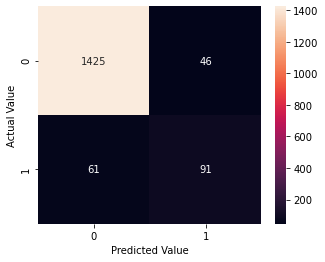

In [48]:
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True,  fmt='g')
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')

In [41]:
RF_Grid_Recall = 91/(91+61)
RF_Grid_Recall

0.5986842105263158

In [31]:
# Feature Importance
tree_final = rf_Grid.best_estimator_
feature_importance = list(zip(X_train.columns, tree_final.feature_importances_))
sorted(feature_importance, key=lambda imp: imp[1], reverse=True)

[('DiagnosisGroupCode_count', 0.2454212729503589),
 ('Unique_DiagnosisGroupCode', 0.11827911711009197),
 ('ClmAdmitDiagnosisCode_count', 0.08279654905123655),
 ('Unique_ClmAdmitDiagnosisCode', 0.07280236209255053),
 ('Avg_Total_ClmProcedureCode', 0.05247744046707821),
 ('Claim_count', 0.03645681537416567),
 ('Unique_patients', 0.03452061865649323),
 ('Avg_AdmissionDuration', 0.023776388791817083),
 ('Age_50-60', 0.01954051180446756),
 ('Avg_ClaimDuration', 0.01666626063749777),
 ('Age_30-40', 0.015698565462211968),
 ('Unique_States', 0.015447965590989585),
 ('Avg_TotalClaimCost_PerPatient', 0.014950509750161751),
 ('Age_40-50', 0.014891335589425698),
 ('Avg_TotalClaimCost', 0.014661556126963397),
 ('Age_60-70', 0.013692246410006974),
 ('Age_70-80', 0.013453956018020964),
 ('Avg_Total_ClmDiagnosisCode', 0.013105015038355405),
 ('ChronicCond_IschemicHeart', 0.012805883346087878),
 ('ChronicCond_Alzheimer', 0.01226316352396782),
 ('ChronicCond_Heartfailure', 0.011534324041268567),
 ('Age_

<BarContainer object of 35 artists>

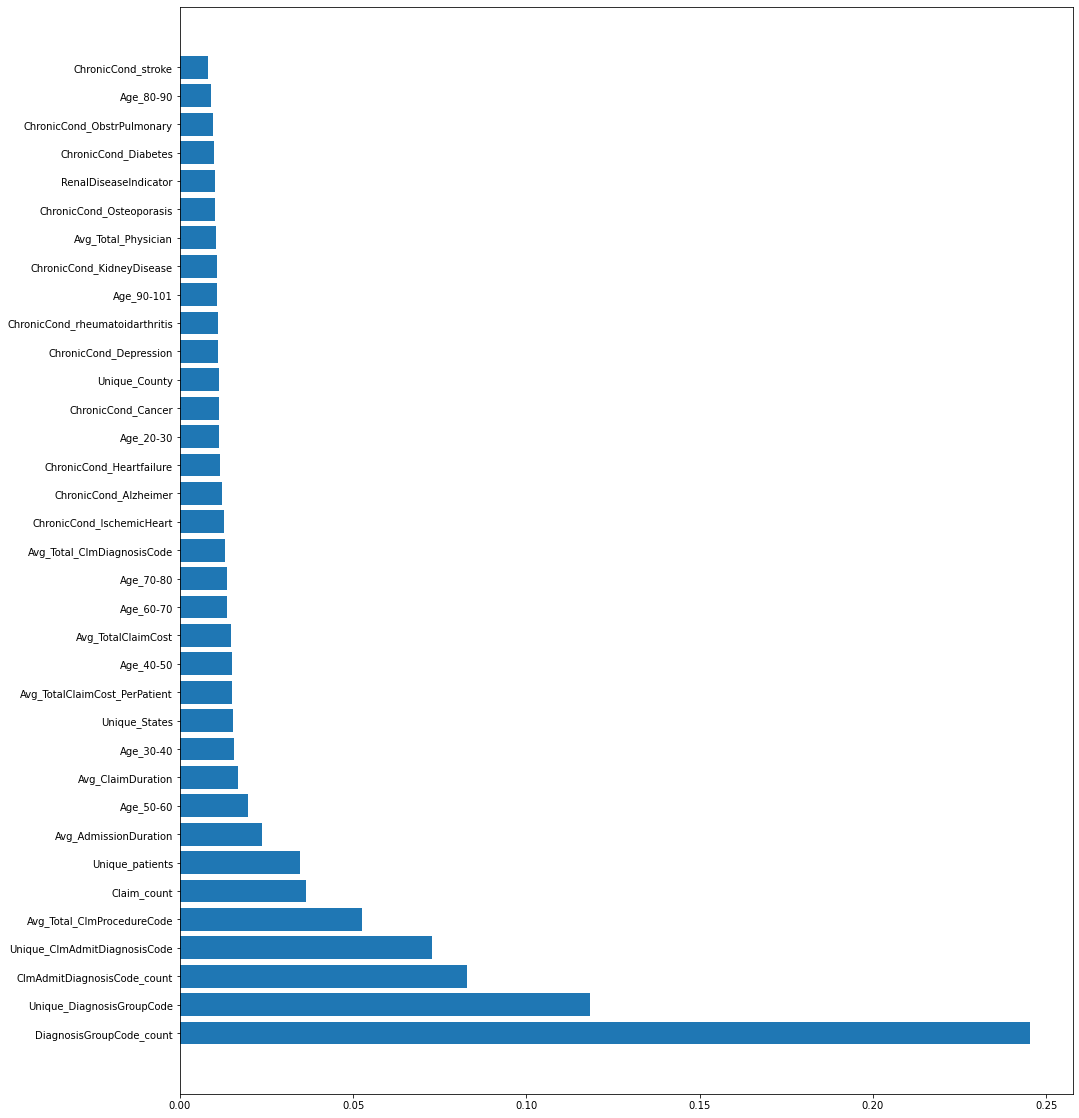

In [32]:
features, importance = zip(*sorted(feature_importance, key=lambda imp: imp[1], reverse=True))
plt.figure(figsize=(16,20))
plt.barh(features, importance)

In [33]:
from sklearn.model_selection import RandomizedSearchCV
rf_RandomGrid = RandomizedSearchCV(estimator = rf_Model, param_distributions = param_grid, cv=KFold(shuffle= True, random_state=1), verbose=2, n_jobs=-1, random_state=1, scoring='roc_auc')

In [34]:
rf_RandomGrid.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
                   estimator=RandomForestClassifier(random_state=1), n_jobs=-1,
                   param_distributions={'criterion': ['gini'],
                                        'max_depth': [12, 13, 14],
                                        'max_features': [8, 10, 12],
                                        'min_samples_leaf': [3, 4, 5],
                                        'n_estimators': [100, 200, 300]},
                   random_state=1, scoring='roc_auc', verbose=2)

In [35]:
rf_RandomGrid.best_params_

{'n_estimators': 300,
 'min_samples_leaf': 3,
 'max_features': 12,
 'max_depth': 14,
 'criterion': 'gini'}

In [36]:
rf_RandomGrid.best_score_

0.9718894912225678

In [37]:
print(rf_RandomGrid.score(X_train, y_train))
print(rf_RandomGrid.score(X_test, y_test))

# GRID SCORES:
# 0.9993964711680519
# 0.9356730115567641

# RANDOMIZED SCORES:
# 0.999438367165767
# 0.9385935096067838

0.999438367165767
0.9385935096067838


In [45]:
# Feature Importance
tree_final2 = rf_RandomGrid.best_estimator_
feature_importance2 = list(zip(X_train.columns, tree_final2.feature_importances_))
sorted(feature_importance2, key=lambda imp: imp[1], reverse=True)

[('DiagnosisGroupCode_count', 0.20805100163855814),
 ('Unique_DiagnosisGroupCode', 0.14590681382432674),
 ('ClmAdmitDiagnosisCode_count', 0.09207450728770927),
 ('Unique_ClmAdmitDiagnosisCode', 0.07529877423943762),
 ('Avg_Total_ClmProcedureCode', 0.0468117669581084),
 ('Claim_count', 0.03492716001535024),
 ('Avg_AdmissionDuration', 0.03113778475494788),
 ('Unique_patients', 0.02941654270226704),
 ('Age_50-60', 0.01942237647019818),
 ('Age_30-40', 0.01796155121353556),
 ('Unique_States', 0.015854910444427838),
 ('Avg_TotalClaimCost', 0.015835894071035164),
 ('Avg_TotalClaimCost_PerPatient', 0.015729648208202232),
 ('Avg_ClaimDuration', 0.015531078852468527),
 ('Age_40-50', 0.014586853559262246),
 ('Avg_Total_ClmDiagnosisCode', 0.013466168713341605),
 ('ChronicCond_Alzheimer', 0.01289307125411715),
 ('ChronicCond_IschemicHeart', 0.012851811740072607),
 ('Unique_County', 0.01276325882987728),
 ('Age_60-70', 0.012709878947008176),
 ('Age_70-80', 0.012648563651982114),
 ('Age_20-30', 0.011

<BarContainer object of 35 artists>

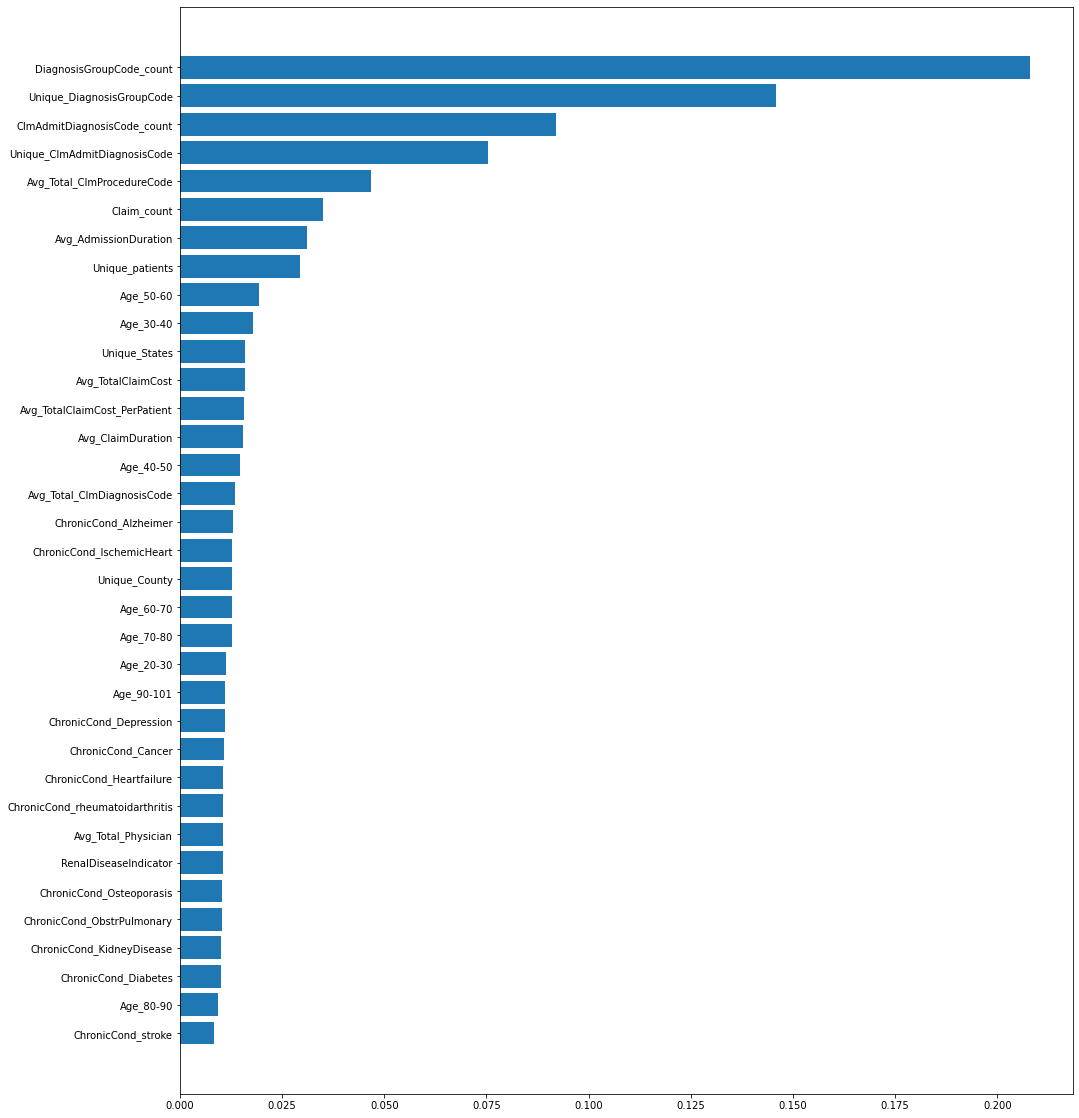

In [49]:
features, importance = zip(*sorted(feature_importance2, key=lambda imp: imp[1], reverse=False))
plt.figure(figsize=(16,20))
plt.barh(features, importance)

In [38]:
from sklearn.metrics import confusion_matrix
y_true = y_test
y_pred = rf_RandomGrid.predict(X_test) 
cmRandom = confusion_matrix(y_true, y_pred)
cmRandom

array([[1424,   47],
       [  58,   94]], dtype=int64)

Text(24.0, 0.5, 'Actual Value')

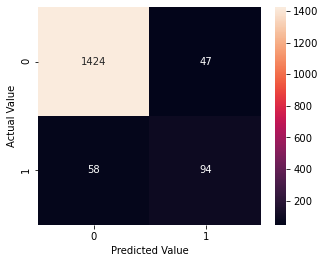

In [47]:
plt.figure(figsize=(5,4))
sns.heatmap(cmRandom, annot=True, fmt='g')
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')

In [40]:
print(cm) #GRIDSEARCH
print("******************************")
print(cmRandom) #RANDOMSEARCH 

[[1425   46]
 [  61   91]]
******************************
[[1424   47]
 [  58   94]]


For our Random Forest model, we choose the Randomized Grid Search which results in recall of 0.62 and 93.86% AUC_ROC score

In [42]:
print(f"The Recall for GridSearch RandomForest: {RF_Grid_Recall}")
RF_Randomized_Recall = 94/(94+58)
print(f"The Recall for Randomized RandomForest: {RF_Randomized_Recall}")

The Recall for GridSearch RandomForest: 0.5986842105263158
The Recall for Randomized RandomForest: 0.618421052631579
